# 逻辑回归

## 数据描述

我们将建立一个逻辑回归模型来预测一个学生是否被大学录取。假设你是一个大学系的管理员，你想根据两次考试的结果来决定每个申请人的录取机会。你有以前的申请人的历史数据，你可以用它作为逻辑回归的训练集。对于每一个培训例子，你有两个考试的申请人的分数和录取决定。为了做到这一点，我们将建立一个分类模型，根据考试成绩估计入学概率。

## 数据读取 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = "LogiReg_data.txt"
df = pd.read_csv(file_path, header=None, names=["Exam 1", "Exam 2", "Aditted"])  # header=True就是表示用数据的第一行表示输出的表头
df.head(10)

,Exam 1,Exam 2,Aditted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [3]:
df.shape  # shape[0]表示取出行的数量，shape[1]表示取出列的数量

(100, 3)

## 取出Aditted==0和Aditted==1的数据（数据预处理）

In [4]:
positive = df[df["Aditted"] == 1]  # print(positive[:10])表示取positive的前十行，具体见Example_pandas/dwx_04_Dataframe案例.py
print(positive[:10])
negitive = df[df["Aditted"] == 0]
print(negitive[:10])

       Exam 1     Exam 2  Aditted
3   60.182599  86.308552        1
4   79.032736  75.344376        1
6   61.106665  96.511426        1
7   75.024746  46.554014        1
8   76.098787  87.420570        1
9   84.432820  43.533393        1
12  82.307053  76.481963        1
13  69.364589  97.718692        1
15  53.971052  89.207350        1
16  69.070144  52.740470        1
       Exam 1     Exam 2  Aditted
0   34.623660  78.024693        0
1   30.286711  43.894998        0
2   35.847409  72.902198        0
5   45.083277  56.316372        0
10  95.861555  38.225278        0
11  75.013658  30.603263        0
14  39.538339  76.036811        0
17  67.946855  46.678574        0
20  67.372028  42.838438        0
22  50.534788  48.855812        0


## 绘图 

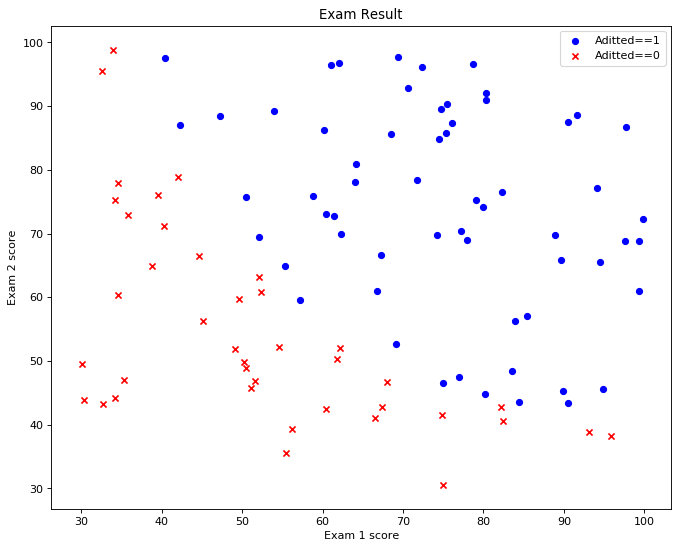

In [5]:
plt.figure(figsize=(10, 8), dpi=80)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.scatter(positive["Exam 1"], positive["Exam 2"], s=30, c='b', marker='o', label="Aditted==1")
plt.scatter(negitive["Exam 1"], negitive["Exam 2"], s=30, c='r', marker='x', label="Aditted==0")
plt.legend()
plt.title("Exam Result")
plt.show()

## The logistic regression 

### sigmoid函数的建立

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

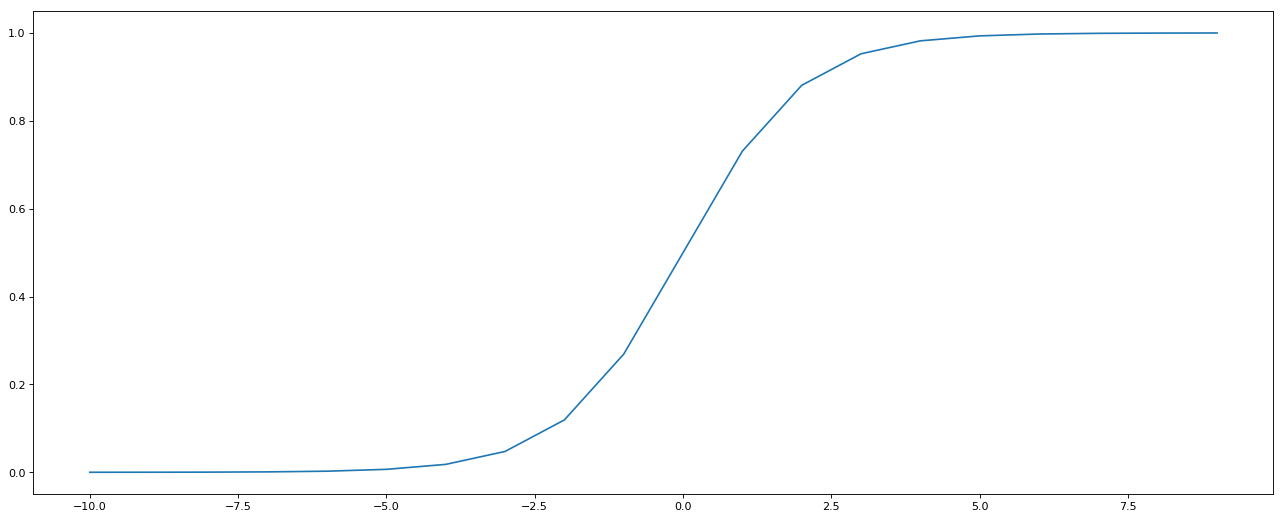

In [7]:
nums = np.array(range(-10, 10))
plt.figure(figsize=(20, 8), dpi=80)
plt.plot(nums, sigmoid(nums))
plt.show()

### model 

In [8]:
def model(X, theta):
    return sigmoid(np.dot(X, theta.T))  # np.dot(a,b)表示数组a*b;a.T表示a矩阵的转置

#### 在这里遇到一个小挫折，用df.insert(0,"Ones",1)在df的第0列加入数据1，又不小心用df.insert(0,"Zeros",0)多添加了一组0，所以想删除0，运用df.drop(["Zeros"],axis=1,inplace=True)，可以按列删除0这一列，记住要用inplace=True，否则df不会因这个命令而改变

In [9]:
# df.drop(["Ones"],axis=1,inplace=True)
df.insert(0, "Ones", 1)  #insert(0, "Ones", 1)表示在第0列插入一组列索引(列名)为“Ones”的数据1
df.head()

,Ones,Exam 1,Exam 2,Aditted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [10]:
# orig_data = df.as_matrix()  # as_matrix()这个命令可以将dataframe转换成矩阵形式，但是现在已经很少用了
orig_data = df.values
print(orig_data[:5])

[[ 1.         34.62365962 78.02469282  0.        ]
 [ 1.         30.28671077 43.89499752  0.        ]
 [ 1.         35.84740877 72.90219803  0.        ]
 [ 1.         60.18259939 86.3085521   1.        ]
 [ 1.         79.03273605 75.34437644  1.        ]]


In [11]:
X = orig_data[:,0:3]
print(X[:5])
y = orig_data[:,3:4]  # TODO 为什么我这里用y = orig_data[:,3]结果是一个行向量
print(y[:5])

[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]]
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]]


In [12]:
theta = np.zeros((1, 3))  # 指定行数和列数需要用元组
print(theta)

[[0. 0. 0.]]


### costfunction

#### 损失函数
将对数似然函数去负号

$$
D(h_\theta(x), y) = -y\log(h_\theta(x)) - (1-y)\log(1-h_\theta(x))
$$
求平均损失
$$
J(\theta)=\frac{1}{n}\sum_{i=1}^{n} D(h_\theta(x_i), y_i)
$$

In [13]:
def cost(X, y, theta):
#     left = np.multiply(-y, np.log(model(X, theta)))
#     right = np.multiply(1-y, np.log(1-model(X, theta)))
#     return np.sum(left - right)/(len(X))
#  上下两种方法都可以，几点说明：
#  np.multiply(a, b)表示a，b对应元素相乘，即第一元素和第一个元素相乘，第二个元素和第二个元素相乘......
#  由于这里使用的不是内积，所以还需要一个求和的步骤
#  len(X)表示返回X的长度或项目个数，不太明白为什么返回的是X的行数
#  对于shape来说取其值必须用中括号，因为其输出就相当于一个元组
    J = np.sum(np.multiply(-y, np.log(model(X, theta))) - np.multiply(1-y, np.log(1-model(X, theta))))/(X.shape[0])  #输出为float64类型
#     J = (np.dot(-y.T, np.log(model(X, theta))) - np.dot((1-y).T, np.log(1-model(X, theta))))/X.shape[0]  # 内积，输出为ndarry类型
    return J

In [14]:
cost(X, y, theta)

0.6931471805599453

### 计算梯度


$$
\frac{\partial J}{\partial \theta_j}=-\frac{1}{m}\sum_{i=1}^n (y_i - h_\theta (x_i))x_{ij}
$$


In [24]:
# def gradient1(X, y, theta):
#     grad = np.zeros(theta.shape)
#     for j in range(len(theta.ravel())):
#         term = np.dot(X[:,j].T, (model(X, theta)-y))/X.shape[0]
#         grad[0, j] = term
#     return grad
def gradient(X, y, theta):
    grad = np.zeros(theta.shape)
    error = (model(X, theta)- y).ravel()
    for j in range(len(theta.ravel())): #for each parmeter
        term = np.multiply(error, X[:,j])
        grad[0, j] = np.sum(term) / len(X)
    
    return grad

In [25]:
# 下面的代码都是为了调试自己的gradient1和gradient实现功能一样
# 注意return的位置，和len函数。ravel（a）函数和flatten(a)函数类似，不过flatten会影响a的值
print(gradient(X, y, theta))
print(gradient1(X, y, theta))
print(len(theta))
print(len(theta.ravel()))
print(X[:,0].T)
print(len(X))
print(X.shape[0])

[[ -0.1        -12.00921659 -11.26284221]]
[[ -0.1        -12.00921659 -11.26284221]]
1
3
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
100
100


a = np.arange(6).reshape((3,2))
print(a)
print(len(a))  # 对于矩阵来说，len(a)只会计算a的行数
print(a.ravel())  # 可以利用a.ravel将矩阵a拉平，且转换成一个列表形式，而且不会改变a的值
print(len(a.ravel()))
print(a)

### 比较不同梯度下降方法

In [17]:
STOP_ITER = 0
STOP_COST = 1
STOP_GRAD = 2
def stopCriterion(type, value, threshold):
    # 设置三种不同的停止策略来作为迭代停止的阈值
    if type == STOP_ITER:
        # 设置迭代迭代次数
        return value > threshold
    elif type == STOP_COST:
        # 当代价函数变化不明显的时候停止
        return abs(value[-1] - value[-2]) < threshold
    elif type == STOP_GRAD:
        # 当梯度下降基本上没什么变化时，停止
        # np.linalg.norm(value)求value的二范数
        return np.linalg.norm(value) < threshold

In [18]:
import numpy.random
# 将数据打乱，以免其中某些规律影响结果的泛化
def shuffData(data):
    np.random.shuffle(data)
    # np.random.shuffle(data)将data中的数据按行打乱
    X = data[:, 0:3]
    y = data[:, 3:4]
    return X, y

In [19]:
import time
# 看一下时间对结果的影响
def descent(data, theta, batchSize, stopType, thresh, alpha):
    # batchSize==1表示随机梯度下降，batchSize==总的样本数就是梯度下降，batchSize==1~总体样本数之间的一个数就是minbatch梯度下降
    # stopType指定停止策略，thresh停止阈值，alpha表示学习率
    init_time = time.time()
    # 迭代开始的时间
    i = 0  # 迭代次数
    k = 0  # 表示batch
    X, y = shuffData(data)
    grad = np.zeros(theta.shape)
    costs = [cost(X, y, theta)]
    
    while True:
        grad = gradient(X[k:k+batchSize], y[k:k+batchSize], theta)
        # 上式表示每次迭代的样本是自己选择的
        k += batchSize  # 取出batch数量个数据
        if k >= n: 
            k = 0 
            X, y = shuffData(data)  # 重新洗牌
        theta = theta - alpha*grad  # 参数更新
        costs.append(cost(X, y, theta)) # 计算新的损失
        i += 1 

        if stopType == STOP_ITER:       value = i
        elif stopType == STOP_COST:     value = costs
        elif stopType == STOP_GRAD:     value = grad
        if stopCriterion(stopType, value, thresh): break
    
    return theta, i-1, costs, grad, time.time() - init_time

In [26]:
def runExpe(data, theta, batchSize, stopType, thresh, alpha):
    #import pdb; pdb.set_trace();
    theta, iter, costs, grad, dur = descent(data, theta, batchSize, stopType, thresh, alpha)
    name = "Original" if (data[:,1]>2).sum() > 1 else "Scaled"
    name += " data - learning rate: {} - ".format(alpha)
    if batchSize==n: strDescType = "Gradient"
    elif batchSize==1:  strDescType = "Stochastic"
    else: strDescType = "Mini-batch ({})".format(batchSize)
    name += strDescType + " descent - Stop: "
    if stopType == STOP_ITER: strStop = "{} iterations".format(thresh)
    elif stopType == STOP_COST: strStop = "costs change < {}".format(thresh)
    else: strStop = "gradient norm < {}".format(thresh)
    name += strStop
    print ("***{}\nTheta: {} - Iter: {} - Last cost: {:03.2f} - Duration: {:03.2f}s".format(
        name, theta, iter, costs[-1], dur))
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(np.arange(len(costs)), costs, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper() + ' - Error vs. Iteration')
    return theta

### 不同的停止策略

#### 设定迭代次数

***Original data - learning rate: 1e-06 - Gradient descent - Stop: 5000 iterations
Theta: [[-0.00027127  0.00705232  0.00376711]] - Iter: 5000 - Last cost: 0.63 - Duration: 0.96s


array([[-0.00027127,  0.00705232,  0.00376711]])

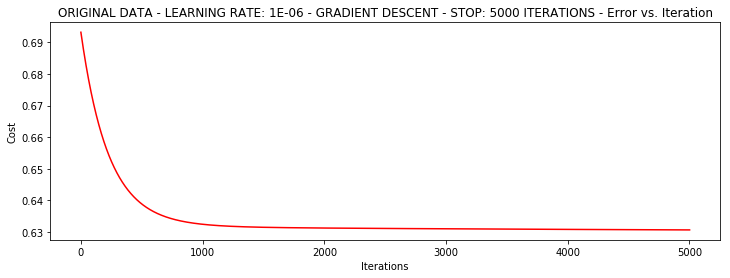

In [27]:
#选择的梯度下降方法是基于所有样本的
n=100
runExpe(orig_data, theta, n, STOP_ITER, thresh=5000, alpha=0.000001)

***Scaled data - learning rate: 0.001 - Gradient descent - Stop: 5000 iterations
Theta: [[0.3080807  0.86494967 0.77367651]] - Iter: 5000 - Last cost: 0.38 - Duration: 0.97s


array([[0.3080807 , 0.86494967, 0.77367651]])

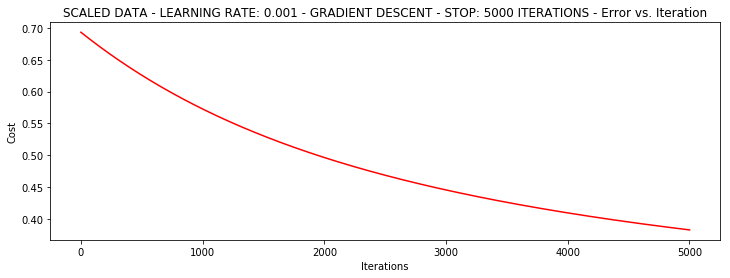

In [28]:
from sklearn import preprocessing as pp

scaled_data = orig_data.copy()
scaled_data[:, 1:3] = pp.scale(orig_data[:, 1:3])

runExpe(scaled_data, theta, n, STOP_ITER, thresh=5000, alpha=0.001)